In [1]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
def find_max_mode(means, cov, sample_size=1000, quantile=0.1, verbose=False):
    if verbose:
        print('Sampling...')
    sample = np.vstack([multivariate_normal.rvs(means[i], cov, size=sample_size) for i in range(means.shape[0])])
    if verbose:
        print('Estimating bandwith...')
    bandwidth = estimate_bandwidth(sample, quantile=quantile, n_samples=1000, n_jobs=-1)
    if verbose:
        print('Fitting MeanShift...')
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
    ms.fit(sample)
    cluster_centers = ms.cluster_centers_
    if verbose:
        plt.scatter(sample[:, 0], sample[:, 1], s=3)
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1])
    return max(
        cluster_centers,
        key=lambda center: sum(multivariate_normal.pdf(center, mean=means[i], cov=cov) for i in range(means.shape[0]))
    )

In [ ]:
def find_max_mode2(means, cov, sample_size=1000, verbose=False):
    # Dumb way, works bad for high dimensional data
    if verbose:
        print('Sampling...')
    sample = np.vstack([multivariate_normal.rvs(means[i], cov, size=sample_size) for i in range(means.shape[0])])
    if verbose:
        plt.scatter(sample[:, 0], sample[:, 1], s=3)
    if verbose:
        print('Searching...')
    return max(
        sample,
        key=lambda center: sum(multivariate_normal.pdf(center, mean=means[i], cov=cov) for i in range(means.shape[0]))
    )

Sampling...
Estimating bandwith...
Fitting MeanShift...


array([0.00020341, 0.00865353])

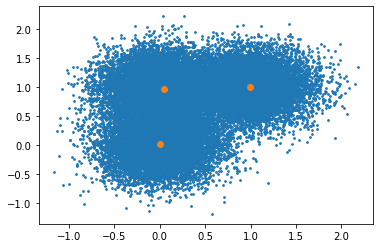

In [3]:
find_max_mode(
    means=np.array([[0, 0], [1, 1], [0, 1]]),
    cov=0.1,
    sample_size=10000,
    verbose=True,
    quantile=0.1
)

Sampling...
Estimating bandwith...
Fitting MeanShift...


array([0.25038329, 0.66604866])

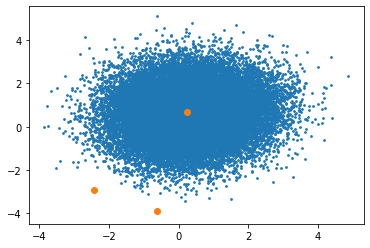

In [4]:
find_max_mode(
    means=np.array([[0, 0], [1, 1], [0, 1]]),
    cov=1,
    sample_size=10000,
    verbose=True,
    quantile=0.1
)

Sampling...
Estimating bandwith...
Fitting MeanShift...


array([-0.00176207,  0.00025909, -0.00029701,  0.00406116, -0.00435703,
       -0.00349015, -0.00086549,  0.00517477, -0.00381379, -0.00028823,
        0.00294652, -0.0022496 ,  0.00142133, -0.00248298,  0.00532175,
        0.00129323, -0.00055906, -0.0011608 , -0.00125429, -0.00806585,
       -0.00257877, -0.00089373,  0.00366447, -0.00246178,  0.00623792,
       -0.00236315, -0.00056268, -0.000534  ,  0.00368327,  0.00342834,
        0.00265612,  0.00271292, -0.00413335,  0.00210446,  0.00265889,
       -0.00718791,  0.00234043, -0.00386088,  0.00127007, -0.00046033,
       -0.00202232, -0.00085674, -0.00574335,  0.00493329,  0.00147232,
        0.00018006, -0.0046134 , -0.00072762, -0.00147348, -0.0084331 ])

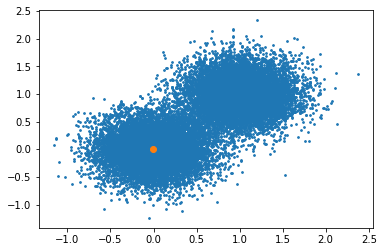

In [10]:
find_max_mode(
    means=np.vstack((np.zeros(50), np.ones(50))),
    cov=0.1,
    sample_size=10000,
    verbose=True,
    quantile=0.1
)

Sampling...
Searching...


array([1.18187552, 0.8408938 , 0.82921132, 1.08913045, 1.09254694,
       0.71189115, 0.87816278, 0.87457139, 1.07200634, 1.03000902,
       1.14675058, 1.16732791, 0.77944396, 0.83750723, 0.45408123,
       0.77905205, 0.85234934, 1.19191566, 0.86960816, 0.85365613,
       0.92546609, 1.04230631, 0.83824764, 1.02623292, 1.2771167 ,
       0.86060274, 1.14516688, 0.929428  , 1.20273917, 1.15890083,
       0.99116353, 0.9095593 , 1.09309414, 1.10625821, 1.00164138,
       0.74593986, 1.15368033, 1.02676091, 1.01245149, 1.15258279,
       0.72996653, 0.75179336, 0.94037782, 1.24456329, 1.02729727,
       1.17342233, 1.51024512, 1.25683308, 1.02311961, 0.79157818])

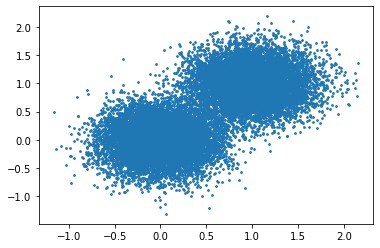

In [18]:
find_max_mode2(
    means=np.vstack((np.zeros(50), np.ones(50))),
    cov=0.1,
    sample_size=10000,
    verbose=True
)